In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sep1920 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200919.txt')
sep1220 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200912.txt')
sep0720 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200905.txt')
aug2920 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
aug2220 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200822.txt')

In [3]:
df = pd.concat([sep1920, sep1220, sep0720, aug2920, aug2220])

In [4]:
df['DATETIME'] = pd.to_datetime(df['DATE'] + ' ' + df['TIME'])

In [5]:
df.drop(columns = ['DATE', 'TIME'], inplace = True)
df = df.drop(df[df['DESC'] != 'REGULAR'].index)

In [6]:
station_df = df.groupby(['STATION',df['DATETIME'].dt.date]).first()

In [7]:
station_df.head()

C/A  UNIT       SCP LINENAME DIVISION     DESC   ENTRIES  \
STATION DATETIME                                                                
1 AV    2020-08-15  H007  R248  00-00-00        L      BMT  REGULAR  15465166   
        2020-08-16  H007  R248  00-00-00        L      BMT  REGULAR  15465632   
        2020-08-17  H007  R248  00-00-00        L      BMT  REGULAR  15465929   
        2020-08-18  H007  R248  00-00-00        L      BMT  REGULAR  15466644   
        2020-08-19  H007  R248  00-00-00        L      BMT  REGULAR  15467421   

                    EXITS                                                                 \
STATION DATETIME                                                                           
1 AV    2020-08-15                                           17360173                      
        2020-08-16                                           17361146                      
        2020-08-17                                           17361748                      
        2020-08-18                                           17363087                      
        2020-08-19                                           17364574                      

                     DATETIME  
STATION DATETIME               
1 AV    2020-08-15 2020-08-15  
        2020-08-16 2020-08-16  
        2020-08-17 2020-08-17  
        2020-08-18 2020-08-18  
        2020-08-19 2020-08-19

In [8]:
station_df.drop(columns=['DATETIME'], inplace=True)
station_df.reset_index(level=1, inplace=True)

In [9]:
station_df.columns = station_df.columns.str.strip()

In [10]:
for index in station_df.index.unique():
    station_df['ENTRIES'].loc[index] = station_df['ENTRIES'].loc[index].diff()
    station_df['EXITS'].loc[index] = station_df['EXITS'].loc[index].diff()

/home/mason/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
station_df = station_df.dropna(how='any')

In [12]:
station_df.reset_index(level=0, inplace=True)

In [13]:
station_df= station_df.drop(station_df[station_df['ENTRIES'] < 0].index)

In [14]:
station_df[station_df.STATION == '1 AV']

,STATION,DATETIME,C/A,UNIT,SCP,LINENAME,DIVISION,DESC,ENTRIES,EXITS
0,1 AV,2020-08-16,H007,R248,00-00-00,L,BMT,REGULAR,466.0,973.0
1,1 AV,2020-08-17,H007,R248,00-00-00,L,BMT,REGULAR,297.0,602.0
2,1 AV,2020-08-18,H007,R248,00-00-00,L,BMT,REGULAR,715.0,1339.0
3,1 AV,2020-08-19,H007,R248,00-00-00,L,BMT,REGULAR,777.0,1487.0
4,1 AV,2020-08-20,H007,R248,00-00-00,L,BMT,REGULAR,730.0,1468.0
5,1 AV,2020-08-21,H007,R248,00-00-00,L,BMT,REGULAR,334.0,1543.0
6,1 AV,2020-08-22,H007,R248,00-00-00,L,BMT,REGULAR,321.0,1626.0
7,1 AV,2020-08-23,H007,R248,00-00-00,L,BMT,REGULAR,215.0,1004.0
8,1 AV,2020-08-24,H007,R248,00-00-00,L,BMT,REGULAR,139.0,828.0
9,1 AV,2020-08-25,H007,R248,00-00-00,L,BMT,REGULAR,167.0,1358.0


In [15]:
entries_sums = station_df.groupby('STATION').ENTRIES.sum()
entries_sums.sort_values(ascending=False, inplace=True)

In [16]:
entries_sums.iloc[16:36]

STATION
3 AV-149 ST        51611.0
PARKCHESTER        44810.0
QUEENSBORO PLZ     43273.0
36 ST              38505.0
86 ST-2 AVE        36442.0
GATES AV           34005.0
HOYT-SCHER         33684.0
34 ST-HERALD SQ    33600.0
MARBLE HILL-225    32814.0
NOSTRAND AV        32529.0
NEWKIRK PLAZA      31619.0
61 ST WOODSIDE     31564.0
YORK ST            31430.0
MYRTLE AV          31119.0
53 ST              29560.0
JKSN HT-ROOSVLT    28918.0
CORTELYOU RD       28481.0
103 ST-CORONA      28352.0
207 ST             28134.0
BURNSIDE AV        27222.0
Name: ENTRIES, dtype: float64

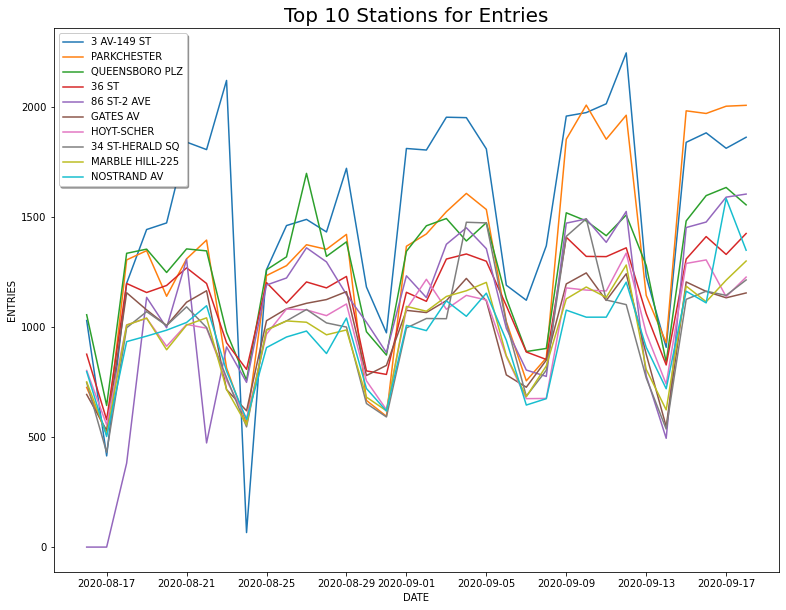

In [17]:
station_df['DATETIME'] = pd.to_datetime(station_df['DATETIME'])
plt.figure(figsize = [13,10])
for station in entries_sums.iloc[16:26].index:
    plt.plot(station_df[station_df['STATION'] == station].DATETIME.dt.date, station_df[station_df['STATION'] == station].ENTRIES)
plt.legend(entries_sums.iloc[16:26].index,shadow = True, loc = 0);
plt.xlabel('DATE')
plt.ylabel('ENTRIES')
plt.title('Top 10 Stations for Entries', size=20);

In [18]:
station_df = station_df.drop(station_df[station_df['EXITS'] < 0].index)

In [19]:
exits_sums = station_df.groupby('STATION').EXITS.sum()
exits_sums.sort_values(ascending=False, inplace=True)

In [20]:
exits_sums.iloc[14:24]

STATION
MYRTLE-WYCKOFF    84579.0
JUNCTION BLVD     79220.0
103 ST-CORONA     66643.0
PATH WTC 2        58271.0
MYRTLE AV         57841.0
30 AV             56830.0
JAMAICA CENTER    56533.0
36 ST             55196.0
YORK ST           55106.0
W 4 ST-WASH SQ    55002.0
Name: EXITS, dtype: float64

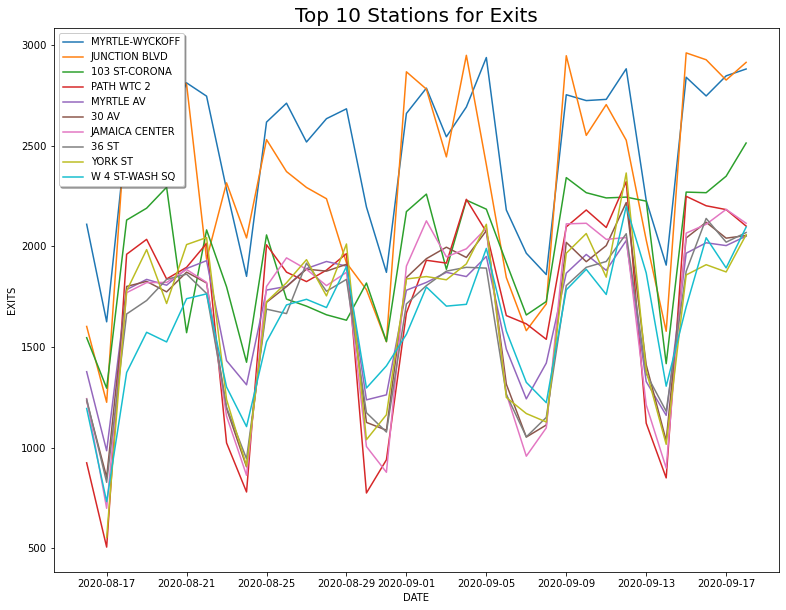

In [21]:
plt.figure(figsize = [13,10])
for station in exits_sums.iloc[14:24].index:
    plt.plot(station_df[station_df['STATION'] == station].DATETIME.dt.date, station_df[station_df['STATION'] == station].EXITS)
plt.legend(exits_sums.iloc[14:24].index,shadow = True, loc = 0);
plt.xlabel('DATE')
plt.ylabel('EXITS')
plt.title('Top 10 Stations for Exits', size=20);

In [22]:
df_night = df.groupby(['STATION', df['DATETIME'].dt.date]).tail(3)
df_night.columns = df_night.columns.str.strip()
df_night.reset_index(level=0, inplace=True)


In [23]:
df_night['EXITS'] = df_night.groupby(['STATION', df_night['DATETIME'].dt.date]).EXITS.diff()
        
df_night = df_night.dropna(how='any')

<ipython-input-23-4ab78608b885>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_night['EXITS'] = df_night.groupby(['STATION', df_night['DATETIME'].dt.date]).EXITS.diff()


In [24]:
df_night = df_night.drop(df_night[df_night['EXITS'] < 0].index)

df_night[df_night.STATION == '1 AV']

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,DATETIME
889,33926,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,78754,10.0,2020-09-12 16:00:00
890,33927,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,79033,28.0,2020-09-12 20:00:00
892,33932,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,79538,28.0,2020-09-13 16:00:00
893,33933,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,79765,22.0,2020-09-13 20:00:00
895,33938,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,80431,21.0,2020-09-14 16:00:00
...,...,...,...,...,...,...,...,...,...,...,...
32714,33330,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,56362,10.0,2020-08-19 20:00:00
32716,33334,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,56857,19.0,2020-08-20 16:00:00
32717,33335,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,57222,18.0,2020-08-20 20:00:00
32719,33340,H008,R248,01-00-04,1 AV,L,BMT,REGULAR,57912,16.0,2020-08-21 16:00:00


In [25]:
exits_sums_night = df_night.groupby('STATION').EXITS.sum()

exits_sums_night.sort_values(ascending=False, inplace=True)

exits_sums_night.iloc[3:23]


STATION
50 ST              47958239.0
NEWKIRK AV         31396831.0
FRANKLIN AV        13872072.0
NEWKIRK PLAZA      13655719.0
BEVERLEY ROAD       9789726.0
EASTN PKWY-MUSM     7701576.0
BOWERY              7284980.0
WESTCHESTER SQ      5483785.0
RALPH AV            4290977.0
HARLEM 148 ST       3887590.0
E 149 ST            3677653.0
103 ST-CORONA       3437038.0
191 ST              2657795.0
51 ST               2546929.0
HUNTERS PT AV       2275330.0
CORTELYOU RD        2142138.0
WEST FARMS SQ       1550846.0
82 ST-JACKSON H     1156129.0
6 AV                1002124.0
PARSONS BLVD         829288.0
Name: EXITS, dtype: float64

In [26]:
entry_df = pd.DataFrame(pd.Series(entries_sums))

In [27]:
exit_df= pd.DataFrame(pd.Series(exits_sums))

In [28]:
entry_df.head(20)

,ENTRIES
STATION,
BAY RIDGE AV,1.560161e+09
CARROLL ST,4.094809e+08
LONGWOOD AV,9.505326e+07
ROCKAWAY AV,2.993476e+07
47-50 STS ROCK,1.055482e+07
116 ST-COLUMBIA,9.144579e+06
FLATBUSH AV-B.C,7.222024e+06
GRAHAM AV,5.953119e+06
LORIMER ST,5.814280e+06


In [29]:
loca_df = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
loca_df.info()
loca_df['STATION']=loca_df['Stop Name'].str.upper()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 496 entries, 0 to 495
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Station ID             496 non-null    int64  
 1   Complex ID             496 non-null    int64  
 2   GTFS Stop ID           496 non-null    object 
 3   Division               496 non-null    object 
 4   Line                   496 non-null    object 
 5   Stop Name              496 non-null    object 
 6   Borough                496 non-null    object 
 7   Daytime Routes         496 non-null    object 
 8   Structure              496 non-null    object 
 9   GTFS Latitude          496 non-null    float64
 10  GTFS Longitude         496 non-null    float64
 11  North Direction Label  478 non-null    object 
 12  South Direction Label  481 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 50.5+ KB


In [30]:
long_lat_full =loca_df.set_index(['STATION'])

In [31]:
long_lat_full.head()

,Station ID,Complex ID,GTFS Stop ID,Division,Line,Stop Name,Borough,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label
STATION,,,,,,,,,,,,,
ASTORIA - DITMARS BLVD,1,1,R01,BMT,Astoria,Astoria - Ditmars Blvd,Q,N W,Elevated,40.775036,-73.912034,NaN,Manhattan
ASTORIA BLVD,2,2,R03,BMT,Astoria,Astoria Blvd,Q,N W,Elevated,40.770258,-73.917843,Ditmars Blvd,Manhattan
30 AV,3,3,R04,BMT,Astoria,30 Av,Q,N W,Elevated,40.766779,-73.921479,Astoria - Ditmars Blvd,Manhattan
BROADWAY,4,4,R05,BMT,Astoria,Broadway,Q,N W,Elevated,40.761820,-73.925508,Astoria - Ditmars Blvd,Manhattan
36 AV,5,5,R06,BMT,Astoria,36 Av,Q,N W,Elevated,40.756804,-73.929575,Astoria - Ditmars Blvd,Manhattan


In [32]:
long_lat=long_lat_full[['GTFS Latitude','GTFS Longitude']]

In [33]:
first_only=long_lat.groupby(['STATION']).first()

In [34]:
closed = ['69 ST', '52 ST', '46 ST', '40 ST', '33 ST', 'SUTPHIN BLVD - ARCHER AV - JFK AIRPORT', 
         'JAMAICA CENTER - PARSONS/ARCHER']

closed_df = first_only.loc[closed]
closed_df

,GTFS Latitude,GTFS Longitude
STATION,,
69 ST,40.746325,-73.896403
52 ST,40.744149,-73.912549
46 ST,40.756312,-73.913333
40 ST,40.743781,-73.924016
33 ST,40.746081,-73.982076
SUTPHIN BLVD - ARCHER AV - JFK AIRPORT,40.700486,-73.807969
JAMAICA CENTER - PARSONS/ARCHER,40.702147,-73.801109


In [35]:
entry_df.head(20)

,ENTRIES
STATION,
BAY RIDGE AV,1.560161e+09
CARROLL ST,4.094809e+08
LONGWOOD AV,9.505326e+07
ROCKAWAY AV,2.993476e+07
47-50 STS ROCK,1.055482e+07
116 ST-COLUMBIA,9.144579e+06
FLATBUSH AV-B.C,7.222024e+06
GRAHAM AV,5.953119e+06
LORIMER ST,5.814280e+06


In [36]:
first_only.reset_index(level=0, inplace=True)
    

In [37]:
entry_df.reset_index(level=0, inplace=True)



In [38]:
exit_df.reset_index(level=0, inplace=True)


In [39]:
exits_sums_night = pd.DataFrame(exits_sums_night)

In [40]:
exits_sums_night.reset_index(level=0, inplace=True)


In [41]:
exits_sums_night.head(30)

,STATION,EXITS
0,ELMHURST AV,1.944048e+09
1,MORGAN AV,1.739661e+09
2,215 ST,1.691836e+08
3,50 ST,4.795824e+07
4,NEWKIRK AV,3.139683e+07
5,FRANKLIN AV,1.387207e+07
6,NEWKIRK PLAZA,1.365572e+07
7,BEVERLEY ROAD,9.789726e+06
8,EASTN PKWY-MUSM,7.701576e+06
9,BOWERY,7.284980e+06


In [42]:
import fuzzymatcher

In [43]:
final_entries = fuzzymatcher.fuzzy_left_join(entry_df, first_only, left_on='STATION', right_on='STATION').head(50)

In [44]:
final_exits = fuzzymatcher.fuzzy_left_join(exit_df, first_only, left_on='STATION', right_on='STATION').head(50)

In [45]:
final_exits_night = fuzzymatcher.fuzzy_left_join(exits_sums_night, first_only, left_on='STATION', right_on='STATION').head(50)

In [46]:
final_entries[['STATION_left', 'ENTRIES', 'GTFS Latitude', 'GTFS Longitude']].head(10)

,STATION_left,ENTRIES,GTFS Latitude,GTFS Longitude
0,BAY RIDGE AV,1.560161e+09,40.634967,-74.023377
1,CARROLL ST,4.094809e+08,40.680303,-73.995048
2,LONGWOOD AV,9.505326e+07,40.816104,-73.896435
3,ROCKAWAY AV,2.993476e+07,40.678340,-73.911946
5,47-50 STS ROCK,1.055482e+07,40.758663,-73.981329
6,116 ST-COLUMBIA,9.144579e+06,40.807722,-73.964110
7,FLATBUSH AV-B.C,7.222024e+06,40.632836,-73.947642
59,GRAHAM AV,5.953119e+06,40.714565,-73.944053
60,LORIMER ST,5.814280e+06,40.703869,-73.947408
61,HEWES ST,5.324148e+06,40.706870,-73.953431


In [47]:
import folium

In [48]:
final_exits = final_exits[14:]

In [49]:
final_entries = final_entries[16:]

In [50]:
final_entries.head(20)

,best_match_score,__id_left,__id_right,STATION_left,ENTRIES,STATION_right,GTFS Latitude,GTFS Longitude
70,0.274333,16_left,55_right,3 AV-149 ST,51611.0,3 AV - 149 ST,40.816109,-73.917757
71,0.295220,17_left,312_right,PARKCHESTER,44810.0,PARKCHESTER,40.833226,-73.860816
72,0.271921,18_left,325_right,QUEENSBORO PLZ,43273.0,QUEENSBORO PLAZA,40.750582,-73.940202
73,0.130903,19_left,62_right,36 ST,38505.0,36 ST,40.655144,-74.003549
75,0.004627,20_left,38_right,86 ST-2 AVE,36442.0,2 AV,40.723402,-73.989938
127,0.257284,21_left,228_right,GATES AV,34005.0,GATES AV,40.689630,-73.922270
128,0.054221,22_left,247_right,HOYT-SCHER,33684.0,HOYT ST,40.690545,-73.985065
130,0.465235,23_left,59_right,34 ST-HERALD SQ,33600.0,34 ST - HERALD SQ,40.749567,-73.987950
131,0.417346,24_left,278_right,MARBLE HILL-225,32814.0,MARBLE HILL - 225 ST,40.874561,-73.909831
132,0.237216,25_left,306_right,NOSTRAND AV,32529.0,NOSTRAND AV,40.680438,-73.950426


In [51]:
final_entries = final_entries.dropna(how='any')

In [52]:
final_exits = final_exits.dropna(how='any')

In [59]:
folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=12,
                            tiles="CartoDB positron")
for i,j in final_entries[['STATION_left', 'ENTRIES', 'GTFS Latitude', 'GTFS Longitude']][:30].iterrows():
    marker = folium.CircleMarker(location=[j.iloc[2], j.iloc[3]],
                                radius= j.iloc[1]/2000,
                                fill=True,
                                color = '#0A8A9F',
                                popup=(f"station name: {j.iloc[0]} </br>total entries: {j.iloc[1]}"))
    marker.add_to(folium_map)
    
for i,j in final_exits[['STATION_left', 'EXITS', 'GTFS Latitude', 'GTFS Longitude']][:30].iterrows():
    marker = folium.CircleMarker(location=[j.iloc[2], j.iloc[3]],
                                radius= j.iloc[1]/2000,
                                fill=True,
                                color = '#E37222',
                                popup=(f"station name: {j.iloc[0]} </br> total exits: {j.iloc[1]}"))
    marker.add_to(folium_map)

for i, j in long_lat.iterrows():
    marker= folium.CircleMarker(location=[j.iloc[0], j.iloc[1]],
                                radius= 0.25,
                                fill=True,
                                color = '#800606',
                                popup=(f"{i}"))
    marker.add_to(folium_map)


#folium_map.choropleth(geo_data='nyc-zip-code-tabulation-areas-polygons.geojson')

In [60]:
folium_map

In [61]:
final_exits_night = final_exits_night[4:]

In [62]:
final_exits_night = final_exits_night.dropna(how='any')

In [63]:
import folium
import pandas as pd

income = pd.read_csv("Median Incomes.csv", header=4)

long_lat = pd.read_csv(
    "http://web.mta.info/developers/data/nyct/subway/Stations.csv"
)
income = income[income["Household Type"] == "All Households"]
income = income[income["TimeFrame"] == 2018]

locations = income["Location"].to_string()

coordinates = [
    (40.7128, -74.0060),
    (40.7831, -73.9712),
    (40.7031, -74.0160),
    (40.7336, -74.0027),
    (40.7150, -73.9843),
    (40.7465, -74.0014),
    (40.7549, -73.9840),
    (40.7479, -73.9757),
    (40.7870, -73.9754),
    (40.7736, -73.9566),
    (40.8171, -73.9560),
    (40.8089, -73.9482),
    (40.7957, -73.9389),
    (40.8417, -73.9394),
    (40.8448, -73.8648),
    (40.8091, -73.9229),
    (40.8094, -73.8803),
    (40.8311, -73.9059),
    (40.8369, -73.9271),
    (40.8575, -73.9097),
    (40.8454, -73.8910),
    (40.8701, -73.8857),
    (40.8996, -73.9088),
    (40.8303, -73.8507),
    (40.8184, -73.8213),
    (40.8553, -73.8640),
    (40.8788, -73.8528),
    (40.6782, -73.9442),
    (40.7081, -73.9571),
    (40.6921, -73.9742),
    (40.6872, -73.9418),
    (40.6958, -73.9171),
    (40.6591, -73.8759),
    (40.6711, -73.9814),
    (40.6527, -74.0093),
    (40.6755, -73.9417),
    (40.6670, -73.9424),
    (40.6264, -74.0299),
    (40.6139, -73.9922),
    (40.6350, -73.9921),
    (40.5755, -73.9707),
    (40.6415, -73.9594),
    (40.5954, -73.9458),
    (40.6552, -73.9125),
    (40.6482, -73.9300),
    (40.6402, -73.9061),
    (40.7282, -73.7949),
    (40.7644, -73.9235),
    (40.7433, -73.9196),
    (40.7557, -73.8831),
    (40.7380, -73.8801),
    (40.7044, -73.9018),
    (40.7256, -73.8625),
    (40.7675, -73.8331),
    (40.7335, -73.7801),
    (40.6901, -73.8566),
    (40.6571, -73.8430),
    (40.7586, -73.7654),
    (40.7027, -73.7890),
    (40.7157, -73.7419),
    (40.5927, -73.7978),
    (40.5795, -74.1502),
    (40.6427, -74.0799),
    (40.5904, -74.0668),
    (40.5083, -74.2355),
]

income["lat_long"] = coordinates

income["lat"] = income["lat_long"].apply(lambda x: x[0])
income["long"] = income["lat_long"].apply(lambda x: x[1])
income.drop(columns="lat_long")


,Location,Household Type,TimeFrame,DataFormat,Data,Fips,lat,long
52,New York City,All Households,2018,Dollars,63799.0,3651000,40.7128,-74.0060
58,Manhattan,All Households,2018,Dollars,85066.0,36061,40.7831,-73.9712
163,Battery Park/Tribeca,All Households,2018,Dollars,148152.0,101,40.7031,-74.0160
172,Greenwich Village,All Households,2018,Dollars,148152.0,102,40.7336,-74.0027
275,Lower East Side,All Households,2018,Dollars,48376.0,103,40.7150,-73.9843
...,...,...,...,...,...,...,...,...
3409,The Rockaways,All Households,2018,Dollars,60650.0,414,40.5927,-73.7978
3418,Staten Island,All Households,2018,Dollars,82166.0,36085,40.5795,-74.1502
3523,St. George,All Households,2018,Dollars,73148.0,501,40.6427,-74.0799
3532,South Beach,All Households,2018,Dollars,90382.0,502,40.5904,-74.0668


In [78]:
folium_map = folium.Map(location=[40.738, -73.98],
                            zoom_start=12,
                            tiles="CartoDB dark_matter")
for i,j in final_exits_night[['STATION_left', 'EXITS', 'GTFS Latitude', 'GTFS Longitude']][:30].iterrows():
    marker = folium.CircleMarker(location=[j.iloc[2], j.iloc[3]],
                                radius= j.iloc[1]/500000,
                                fill=True,
                                color = 'crimson',
                                popup=(f"station name: {j.iloc[0]} </br>exits: {j.iloc[1]}"))
    marker.add_to(folium_map)

for index, row in income.iterrows():

        # generate the popup message that is shown on click.
        popup_text = "{}<b/> Median Household Income: {}"
        popup_text = popup_text.format(row["Location"], row["Data"])

        # radius of circles
        radius = row["Data"] / 5000

        # color
        color = "#007849"

        # add marker to the map
        folium.CircleMarker(
            location=(row["lat"], row["long"]),
            radius=radius,
            color=color,
            popup=popup_text,
            fill=True,
        ).add_to(folium_map)
        


In [79]:
folium_map

In [81]:
folium_map.save('night_map.html')

Text(0.5, 1.0, 'Entries Distribution')

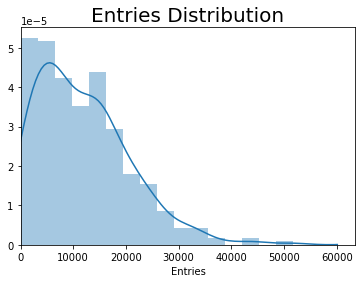

In [84]:
import seaborn as sns
#Entires Distribution
dist_plot_entries = sns.distplot(entries_sums[16:], axlabel = 'Entries')
dist_plot_entries.set(xlim=(0,None))
#dist_plot_entries.set_title('Entries Distribution')
plt.title('Entries Distribution', size=20)


Text(0.5, 1.0, 'Exits Distribution')

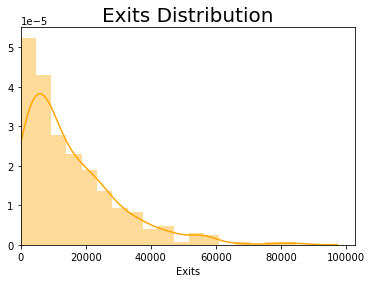

In [86]:
#Exits Distribution
dist_plot_exits = sns.distplot(exits_sums[14:], axlabel = 'Exits',color='orange')
dist_plot_exits.set(xlim=(0,None))
plt.title('Exits Distribution', size=20)


In [ ]:
!pwd

In [ ]:
ridership = pd.read_csv('https://new.mta.info/document/17771', parse_dates=['Date'], keep_date_col=True)

In [ ]:
ridership.head()

In [ ]:
plt.figure(figsize = [10,5])
plt.plot(ridership.iloc[:,0], ridership.iloc[:,1])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Daily Subway Ridership',fontsize = 15, color='black');

In [ ]:
ridership[ridership.iloc[:,1]==ridership.iloc[:,1].min()]

In [ ]:
ridership[ridership.iloc[:,1]==ridership.iloc[:,1].max()]

In [ ]:
six_week_ridership = ridership[:45]

In [ ]:
plt.figure(figsize = [10,5])
plt.plot(six_week_ridership.iloc[:,0], six_week_ridership.iloc[:,1])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Total Daily Subway Ridership',fontsize = 15, color='black')
#ticks_x = np.linspace(0,35,5)
months = ['Jan','Feb','Mar','Apr', 'blah']
#plt.xticks(np.arange(5), fontsize = '20', family = 'fantasy',color='orange');

In [ ]:
weeks = six_week_ridership.iloc[:,0].dt.isocalendar().week

In [ ]:
by_week_df.head()

In [ ]:
covid = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', parse_dates=['date'], keep_date_col=True)

In [ ]:
ny_cov = covid[covid.state=='New York']

In [ ]:
ny_cov.head()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(20, 10))
plt.style.use('seaborn')
ax[0].plot(ny_cov.iloc[:,0], ny_cov.iloc[:,3], linewidth=5, c='r')
ax[0].set_title('Covid in New York', weight='bold', size = 25)
ax[0].set_ylabel('Number of Cases', size =15)
plt.style.use('ggplot')

ax[1].plot(ridership.iloc[:,0], ridership.iloc[:,1], linewidth = 5, c ='b')
ax[1].set_title('Total MTA Subway Ridership', weight='bold', size=25)
ax[1].set_ylabel('Riders in Hundred Thousands',size=15)
ax[1].set_xlabel('Months', size = 15)
plt.savefig('covid_ridership.png');

In [ ]:
https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson

In [ ]:
folium.GeoJson(chicago_census_tracts).add_to(chicago_map)
